<a href="https://colab.research.google.com/github/starmorn1ng/ASP_MI/blob/main/aspmi_q4_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 13
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['legend.fontsize'] = 13

In [ ]:
!git clone https://github.com/am5113/ASPMI_DeepLearning.git

Cloning into 'ASPMI_DeepLearning'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 31 (delta 2), reused 2 (delta 0), pack-reused 25
Unpacking objects: 100% (31/31), 213.39 KiB | 2.81 MiB/s, done.


In [ ]:
import sys
base_path = 'ASPMI_DeepLearning/'
sys.path.insert(0, base_path) 

In [ ]:
from utilities import *

In [ ]:
deep_network_layers = [10,5, 5, 5,1]
epochs = 20000
learning_rate = 1e-2
noise_power = 0.05

In [ ]:
X = np.load(base_path+'X.npy')
y = np.load(base_path+'y.npy') 
y += np.sqrt(noise_power)*np.random.randn(y.shape[0])

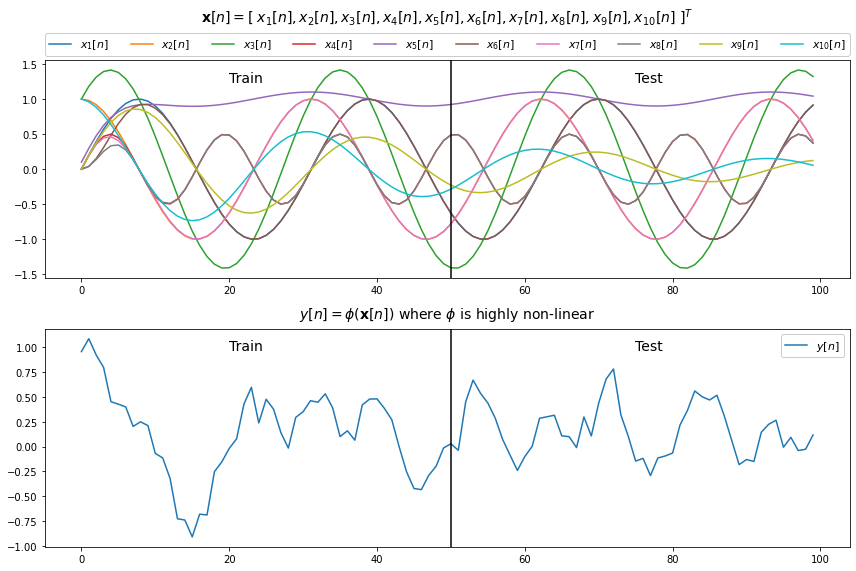

In [ ]:
plot_data(X, y)

In [ ]:
models = [LMS(), nonlinear_LMS(), deep_network(deep_network_layers)]

loss = train_models(X, y, models, epochs, learning_rate)

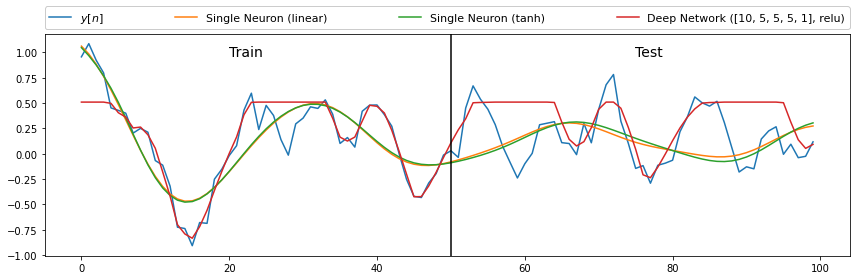

In [ ]:
plot_output(X, y, models, deep_network_layers)

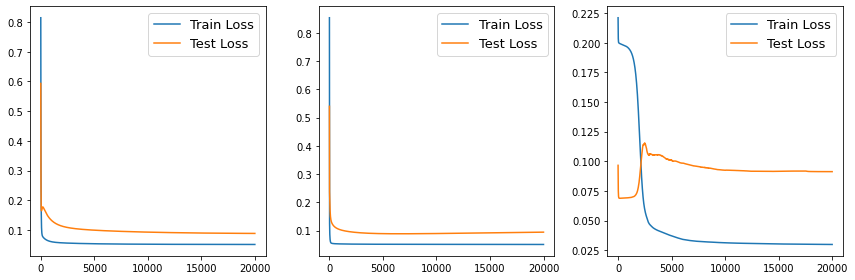

In [ ]:
def plot_learning_curves(loss):
    plt.figure(figsize=(12,4))
    gs = gridspec.GridSpec(1, 3) 

    for i, l in enumerate(loss):

        # convert from list of tensors to list of np array
        train_loss = [l_tensor.detach().numpy() for l_tensor in l[0]];
        test_loss = [l_tensor.detach().numpy() for l_tensor in l[1]];

        plt.subplot(gs[i])
        plt.plot(train_loss)
        plt.plot(test_loss)
        plt.legend(['Train Loss', 'Test Loss'])

    plt.tight_layout()
    plt.show()

plot_learning_curves(loss)